 # ĐỒ ÁN CUỐI KỲ - LẬP TRÌNH CHO KHOA HỌC DỮ LIỆU
 
 # PHÂN TÍCH DỮ LIỆU VỀ ANIME
 
 Họ tên: Nguyễn Trường An
 
 MSSV: 1712262

---

## Tổng quan về đề tài

### Lí do chọn đề tài

Anime (Phim hoạt hình Nhật Bản) là một đề tài khá phổ biến, bạn có thể chưa xem anime bao giờ nhưng bạn không thể chưa nghe đến nó. Quan trọng hơn hết là mình thích chủ đề này và từng xem khá nhiều bộ anime, điều đó có lẽ sẽ giúp mình giảm bớt khó khăn trong quá trình khám phá dữ liệu.

### Đề tài này sẽ cung cấp cho bạn thông tin gì hữu ích?

- Đề xuất những bộ anime hay nhất phù hợp với lứa tuổi của bạn.
- Những thể loại anime nào là phổ biến và được sản xuất nhiều nhất.
- Nguồn gốc của những bộ anime này (nói cách khác là nó được chuyển thể từ đâu). Đâu là những nguồn cung cấp nhiều nhất trong 10 năm gần đây.

## Import

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

---

## Lấy dữ liệu

* Dữ liệu được dùng trong đồ án này là file "dataanime.csv" đính kèm. Đây là dữ liệu về những bộ anime (phim hoạt hình Nhật Bản) được lấy từ trang kaggle.com, và gốc của dữ liệu là [ở đây](https://www.kaggle.com/canggih/anime-data-score-staff-synopsis-and-genre)
* License: [CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) cho phép sao chép, chia sẻ, biến đổi,... dựa trên dữ liệu gốc.
* Dữ liệu được thu thập từ trang: [MyAnimeList.net](http://www.myanimelist.net)

---

## Khám phá dữ liệu

### Đọc dữ liệu từ file csv vào dataframe

In [2]:
anime_df = pd.read_csv("dataanime.csv")
anime_df.head()

,Title,Type,Episodes,Status,Start airing,End airing,Starting season,Studios,Sources,Genres,Rating,Score,Scored by,Members,Favorites
0,Fullmetal Alchemist: Brotherhood,TV,64,Finished Airing,4/5/2009,7/4/2010,Spring,Bones,Manga,"Action,Military,Adventure,Comedy,Drama,Magic,F...",R,9.25,719706,1176368,105387
1,Kimi no Na wa.,Movie,1,Finished Airing,8/26/2016,-,-,CoMix Wave Films,Light novel,"Supernatural,Drama,Romance,School",PG-13,9.19,454969,705186,33936
2,Gintama°,TV,51,Finished Airing,4/8/2015,3/30/2016,Spring,Bandai Namco Pictures,Manga,"Action,Comedy,Historical,Parody,Samurai,Sci-Fi...",R,9.16,70279,194359,5597
3,Steins;Gate 0,TV,23,Currently Airing,4/12/2018,-,Spring,White Fox,Visual novel,"Sci-Fi,Thriller",PG-13,9.16,12609,186331,1117
4,Steins;Gate,TV,24,Finished Airing,4/6/2011,9/14/2011,Spring,White Fox,Visual novel,"Sci-Fi,Thriller",PG-13,9.14,552791,990419,90365


### Dữ liệu gồm có bao nhiêu dòng và bao nhiêu cột?

Tính số dòng và số cột rồi lần lượt lưu vào 2 biến là `num_rows` và `num_cols`. 

In [3]:
num_rows, num_cols = anime_df.shape
print("Dữ liệu này có {} dòng và {} cột".format(num_rows, num_cols))

Dữ liệu này có 1562 dòng và 15 cột


### Mỗi dòng và mỗi cột có ý nghĩa gì?

Dưới đây là phần mô tả các cột có trong file "dataanime.csv":
- **Title**: Tên của bộ anime, title là duy nhất dùng để phân biệt.
- **Type**: Hình thức trình chiếu (Truyền hình/TV, OVA, ONA,...). Xem thêm tại [đây](https://giaivadap.com/kt/ova-la-gi-ona-la-gi-oad-la-gi-the-loai-phim-gi)
- **Episodes**: Số tập của bộ anime đó.
- **Status**: Tình trạng phát sóng của bộ anime này ("Finished Airing" là đã kết thúc, "Currently Airing" là đang phát sóng).
- **Start airing**: Thời gian (Date) bắt đầu phát sóng bộ anime này.
- **End airing**: Thời gian (Date) kết thúc phát sóng bộ anime này.
- **Starting season**: Anime được phân chia và xếp hạng theo mùa. "Starting season" cho biết anime thuộc mùa nào trong năm (Spring, Summer, Fall, Winter).
- **Studios**: Xưởng phim sản xuất của những bộ anime. Một bộ anime thường chỉ được làm ở 1 Studio.
- **Sources**: Những bộ anime được sản xuất có nguồn gốc từ đâu (manga, light novel, book, original...). Xem giải thích một số thuật ngữ tại [đây](https://chuuniotaku.com/light-novel-la-gi/)
- **Genres**: Anime được chia thành rất nhiều thể loại khác nhau để phù hợp với nhu cầu của người xem. Và mỗi bộ thường là sự kết hợp của ít nhất 2 thể loại trở lên.
- **Rating**: Phân loại theo [Hệ thống phân loại phim ảnh hiện hành của MPAA](https://vi.wikipedia.org/wiki/H%E1%BB%87_th%E1%BB%91ng_ph%C3%A2n_lo%E1%BA%A1i_phim_c%E1%BB%A7a_MPAA).
- **Score**: Điểm đánh giá của bộ anime đó tính trên thang 10 điểm. 
- **Scored by**: Số lượt đánh giá của bộ anime đó.
- **Members**: Số lượng thành viên của bộ anime đó.
- **Favorites**: Số lượt yêu thích của bộ anime đó.

Mỗi dòng trong `anime_df` ứng với thông tin của một bộ anime.

### Mỗi cột  có dtype là gì?

Lấy `dtype` (kiểu dữ liệu của mỗi phần tử) của mỗi cột trong `anime_df` và lưu kết quả vào series `col_dtypes`; series này có index là tên cột. 

In [4]:
col_dtypes = anime_df.dtypes
col_dtypes

Title               object
Type                object
Episodes            object
Status              object
Start airing        object
End airing          object
Starting season     object
Studios             object
Sources             object
Genres              object
Rating              object
Score              float64
Scored by            int64
Members              int64
Favorites            int64
dtype: object

**<font color=red>Vấn đề:</font>**
- Cột "Start airing" và "End airing" đang có kiểu dữ liệu là `object`. Do 2 cột này là 2 mốc thời gian bắt đầu và kết thúc nên để có thể khám phá thêm về 2 cột này, ta sẽ thực hiện bước tiền xử lý là chuyển sang dạng `datetime`.
- Cột "Episodes" cũng đang có kiểu dữ liệu là object. Tuy nhiên, cột này thể hiện số tập phim nên phải là số nguyên. Để có thể tiếp tục khám phá thêm về cột này, ta sẽ thực hiện bước tiền xử lý là chuyển sang dạng `int`.

---

## Tiền xử lý

### Đổi tên cột "Rating"

Cột "Rating" dễ bị nhầm lẫn với xếp hạng (ta đã có cột "Score" để xếp hạng). Trong khi cột này chứa các giá trị để phân loại phim theo độ tuổi, ta sẽ đổi tên lại thành "Classification".

In [5]:
anime_df = anime_df.rename(columns={'Rating':'Classification'})
anime_df.head()

,Title,Type,Episodes,Status,Start airing,End airing,Starting season,Studios,Sources,Genres,Classification,Score,Scored by,Members,Favorites
0,Fullmetal Alchemist: Brotherhood,TV,64,Finished Airing,4/5/2009,7/4/2010,Spring,Bones,Manga,"Action,Military,Adventure,Comedy,Drama,Magic,F...",R,9.25,719706,1176368,105387
1,Kimi no Na wa.,Movie,1,Finished Airing,8/26/2016,-,-,CoMix Wave Films,Light novel,"Supernatural,Drama,Romance,School",PG-13,9.19,454969,705186,33936
2,Gintama°,TV,51,Finished Airing,4/8/2015,3/30/2016,Spring,Bandai Namco Pictures,Manga,"Action,Comedy,Historical,Parody,Samurai,Sci-Fi...",R,9.16,70279,194359,5597
3,Steins;Gate 0,TV,23,Currently Airing,4/12/2018,-,Spring,White Fox,Visual novel,"Sci-Fi,Thriller",PG-13,9.16,12609,186331,1117
4,Steins;Gate,TV,24,Finished Airing,4/6/2011,9/14/2011,Spring,White Fox,Visual novel,"Sci-Fi,Thriller",PG-13,9.14,552791,990419,90365


### Thay thế các giá trị "-" thành NaN

Hầu hết các cột có dtype là object *(Start airing, End airing, Starting season, Sources, Studios,...)* đều chứa rất nhiều giá trị "-" gây khó khăn và xảy ra lỗi cho việc chuyển đổi và tính toán sau này. Do đó ta sẽ thực hiện replace các giá trị "-" thành NaN.

In [6]:
anime_df = anime_df.replace("-", np.nan)
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1562 entries, 0 to 1561
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            1562 non-null   object 
 1   Type             1562 non-null   object 
 2   Episodes         1551 non-null   object 
 3   Status           1562 non-null   object 
 4   Start airing     1548 non-null   object 
 5   End airing       978 non-null    object 
 6   Starting season  821 non-null    object 
 7   Studios          1519 non-null   object 
 8   Sources          1525 non-null   object 
 9   Genres           1562 non-null   object 
 10  Classification   1562 non-null   object 
 11  Score            1562 non-null   float64
 12  Scored by        1562 non-null   int64  
 13  Members          1562 non-null   int64  
 14  Favorites        1562 non-null   int64  
dtypes: float64(1), int64(3), object(11)
memory usage: 183.2+ KB


### Chuyển dtype của cột "Start airing" và "End airing" sang datetime

Thực hiện chuyển `dtype` của 2 cột "Start airing" và "End airing" sang kiểu dữ liệu thời gian (sau khi làm xong thì 2 cột này trong `anime_df` sẽ thay đổi thành `datetime64[ns]`). Ở đây ta sẽ dùng câu lệnh `pd.to_datetime` và để Pandas tự đoán format vì dữ liệu không nhiều và có chứa NaN. Giá trị NaN này sẽ được chuyển thành NaT trong `datetime64[ns]`.

In [7]:
# Chuyển đổi 2 cột "Start airing" và "End airing" sang định dạng datetime
anime_df["Start airing"] = pd.to_datetime(anime_df["Start airing"])
anime_df["End airing"] = pd.to_datetime(anime_df["End airing"])
# Kiểm tra dtypes của 2 cột sau khi chuyển đổi
print(anime_df[["Start airing","End airing"]].dtypes)
# Test ô 382 ban đầu chứa giá trị NaN:
print("\nData type of cell 382 after being transformed:", anime_df["Start airing"].iloc[382])

Start airing    datetime64[ns]
End airing      datetime64[ns]
dtype: object

Data type of cell 382 after being transformed: 1996-04-05 00:00:00


### Chuyển dtype của cột "Episodes" sang float

Chuyển đổi `dtype` của cột "Episodes" thành float khá đơn giản bằng `astype(float)`.

In [8]:
anime_df["Episodes"] = anime_df["Episodes"].astype(float)
anime_df["Episodes"].dtype

dtype('float64')

---

## Quay lại bước khám phá dữ liệu

### Mỗi cột có bao nhiêu giá trị thiếu?

Ta tính số lượng giá trị thiếu của mỗi cột và lưu kết quả vào series `col_num_nans`, trong đó index là tên cột.

In [9]:
col_num_nans = anime_df.isna().sum()
col_num_nans

Title                0
Type                 0
Episodes            11
Status               0
Start airing        14
End airing         584
Starting season    741
Studios             43
Sources             37
Genres               0
Classification       0
Score                0
Scored by            0
Members              0
Favorites            0
dtype: int64

Ta thấy 2 cột "End airing" và "Starting season" thiếu khá nhiều dữ liệu. Vấn đề này có thể giải thích như sau:
- End airing là thời gian ngừng phát sóng bộ anime đó; với những bộ anime trên 100 tập thì thời gian phát sóng vẫn còn đang diễn ra tính thời điểm dữ liệu được thu thập. Bên cạnh đó có những bộ anime chiếu rạp (thể loại Movie và chỉ có 1 tập) thì được chiếu khắp thế giới nên không xác định được khi nào thì nó kết thúc. Vì trong phân tích ta sẽ chỉ tập trung vào cột "Start airing" (cột này có ý nghĩa hơn) nên ta sẽ drop cột "End airing".
- Starting season là mùa phát sóng (anime sẽ được chia theo mùa Xuân, Hạ, Thu, Đông, xem thêm tại [đây](https://kenhanime.net/cung-tim-hieu-mua-anime-va-season-anime-kien-thuc-co-ban-ma-khong-phai-ai-cung-biet/)). Đây là cột dữ liệu thiếu đến nhiều nhất (742). Nguyên nhân có lẽ là trong quá trình thu thập dữ liệu hoặc bị thiếu trên chính trang chủ được dùng để lấy dữ liệu. Tuy nhiên, ta có thể điền các giá trị missing từ tháng của cột "Start airing".

#### Xóa cột "End airing"

In [10]:
anime_df=anime_df.drop("End airing", axis=1)

### Các cột dạng numeric và datetime có miền giá trị như thế nào?

In [11]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1562 entries, 0 to 1561
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Title            1562 non-null   object        
 1   Type             1562 non-null   object        
 2   Episodes         1551 non-null   float64       
 3   Status           1562 non-null   object        
 4   Start airing     1548 non-null   datetime64[ns]
 5   Starting season  821 non-null    object        
 6   Studios          1519 non-null   object        
 7   Sources          1525 non-null   object        
 8   Genres           1562 non-null   object        
 9   Classification   1562 non-null   object        
 10  Score            1562 non-null   float64       
 11  Scored by        1562 non-null   int64         
 12  Members          1562 non-null   int64         
 13  Favorites        1562 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(

Ta có 6 cột có dạng numeric hoặc datetime: "Episodes", "Start airing", "Score", "Score by", "Members", "Favorites". Thực hiện tính miền giá trị (min, max) của 6 cột này và lưu kết quả vào dataframe `col_ranges_df`. Dataframe này có 2 dòng là "min", "max"; có 6 cột là "Episodes", "Start airing", "Score", "Score by", "Members", "Favorites".

In [12]:
num_col_names = anime_df.dtypes.index[anime_df.dtypes != "object"]
col_ranges_df = anime_df.loc[:, num_col_names].agg(["min", "max"])
col_ranges_df

,Episodes,Start airing,Score,Scored by,Members,Favorites
min,1.0,1970-04-01,7.48,144,781,1
max,1787.0,2018-04-13,9.25,993775,1432871,105387


### Các cột dạng categorical có các giá trị nào?

In [13]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1562 entries, 0 to 1561
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Title            1562 non-null   object        
 1   Type             1562 non-null   object        
 2   Episodes         1551 non-null   float64       
 3   Status           1562 non-null   object        
 4   Start airing     1548 non-null   datetime64[ns]
 5   Starting season  821 non-null    object        
 6   Studios          1519 non-null   object        
 7   Sources          1525 non-null   object        
 8   Genres           1562 non-null   object        
 9   Classification   1562 non-null   object        
 10  Score            1562 non-null   float64       
 11  Scored by        1562 non-null   int64         
 12  Members          1562 non-null   int64         
 13  Favorites        1562 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(

`anime_df` có 7 cột dạng categorical là "Type", "Status", "Starting season", "Studios", "Sources", "Genres", "Classification". Tuy nhiên, ta sẽ không xét cột "Status" vì nó chỉ có 2 trạng thái là "Finished Airing" và "Currently Airing". 6 cột còn lại ta tính "range" của mỗi cột này: số lượng các giá trị khác nhau (không tính NaN), và list gồm 3 giá trị khác nhau đầu tiên sau khi đã sort tăng dần tất cả các giá trị khác nhau. Kết quả lưu vào dataframe `cat_col_ranges_df`. Dataframe này có 2 dòng là "num_unique_values", "three_first_values"; và có 6 cột là "Type", "Starting season", "Studios", "Sources", "Genres", "Classification".

In [14]:
cat_col_names = set(anime_df.dtypes.index[anime_df.dtypes == "object"]) - {"Title","Status"}
num_unique_values = anime_df.nunique()
three_first_values = anime_df[cat_col_names].apply(lambda x: list(x.sort_values().unique())[:3])
cat_col_ranges_df = pd.DataFrame(columns=cat_col_names)
cat_col_ranges_df.loc["num_unique_values"]=num_unique_values
cat_col_ranges_df.loc["three_first_values"]=three_first_values
cat_col_ranges_df

,Starting season,Type,Sources,Studios,Genres,Classification
num_unique_values,4,6,13,199,1002,4
three_first_values,"[Fall, Spring, Summer]","[Movie, Music, ONA]","[4-koma manga, Book, Card game]","[8bit, A-1 Pictures, A-1 Pictures,Bridge]","[Action, Action,Adventure, Action,Adventure,Co...","[G, PG, PG-13]"


---

## Đưa ra các câu hỏi cần trả lời

Dưới đây là một số câu hỏi có thể trả lời bằng dữ liệu:
1. Những bộ anime nào đáng xem nhất theo mỗi phân loại (Classification)?
2. Xét theo năm, mùa nào có nhiều sản phẩm với số lượt yêu thích (Favorites) trung bình cao nhất?
3. Số lượng anime được sản xuất theo mỗi thể loại (Genres) là bao nhiêu?
4. Trong 10 năm gần đây, 3 nguồn (Sources) chất lượng nhất dùng để chuyển thể sang anime có sự thay đổi như thế nào?

---

## Tiền xử lý

### Điền dữ liệu bị thiếu của cột "Start season"

Như đã nêu ở bước khám phá dữ liệu, các dữ liệu thiếu của cột "Starting season" sẽ được suy ra từ cột "Start airing". Sau khi nội suy, số giá trị thiếu của cột "Starting season" sẽ ngang bằng với số giá trị thiếu của cột "Start airing".

In [15]:
idx=anime_df[anime_df["Starting season"].isna()]
def season(x):
    if 1<= x <=3: return "Winter"
    if 4<= x <=6: return "Spring"
    if 7<= x <=9: return "Summer"
    if 10<= x <=12: return "Fall"
for i in idx.index:
    if anime_df["Start airing"][i] == "NaT":
        break
    else:            
        anime_df.loc[i,"Starting season"]=season(anime_df.loc[i,"Start airing"].month)
anime_df.isna().sum()

Title               0
Type                0
Episodes           11
Status              0
Start airing       14
Starting season    14
Studios            43
Sources            37
Genres              0
Classification      0
Score               0
Scored by           0
Members             0
Favorites           0
dtype: int64

### Thêm cột "Year" vào dataframe

Câu hỏi thứ 4 ở trên cần sử dụng đến năm phát sóng của bộ anime. Vì vậy, ta sẽ thêm cột "Year" vào `anime_df`, tất nhiên là dữ liệu của cột này sẽ được lấy từ năm của cột "Start airing".

In [16]:
anime_df["Year"]=anime_df["Start airing"].dt.year
anime_df.head()

,Title,Type,Episodes,Status,Start airing,Starting season,Studios,Sources,Genres,Classification,Score,Scored by,Members,Favorites,Year
0,Fullmetal Alchemist: Brotherhood,TV,64.0,Finished Airing,2009-04-05,Spring,Bones,Manga,"Action,Military,Adventure,Comedy,Drama,Magic,F...",R,9.25,719706,1176368,105387,2009.0
1,Kimi no Na wa.,Movie,1.0,Finished Airing,2016-08-26,Summer,CoMix Wave Films,Light novel,"Supernatural,Drama,Romance,School",PG-13,9.19,454969,705186,33936,2016.0
2,Gintama°,TV,51.0,Finished Airing,2015-04-08,Spring,Bandai Namco Pictures,Manga,"Action,Comedy,Historical,Parody,Samurai,Sci-Fi...",R,9.16,70279,194359,5597,2015.0
3,Steins;Gate 0,TV,23.0,Currently Airing,2018-04-12,Spring,White Fox,Visual novel,"Sci-Fi,Thriller",PG-13,9.16,12609,186331,1117,2018.0
4,Steins;Gate,TV,24.0,Finished Airing,2011-04-06,Spring,White Fox,Visual novel,"Sci-Fi,Thriller",PG-13,9.14,552791,990419,90365,2011.0


---

## Phân tích dữ liệu để trả lời cho các câu hỏi

### Những bộ anime nào đáng xem nhất theo mỗi phân loại (Classification)?

Để đánh giá bộ nào đáng xem, ta sẽ dựa vào tiêu chí "Score". Kết quả được lưu vào dataframe `BestAnimes`. DataFrame này có 3 cột là Classification (phân loại theo tuổi), Title (tên anime) và Score (Số điểm đánh giá); mỗi dòng là thông tin của 1 bộ anime đáng xem nhất theo phân lớp độ tuổi đó.

In [17]:
idx = anime_df.groupby("Classification")["Score"].idxmax()
BestAnimes=anime_df[["Classification","Title","Score"]].iloc[idx].sort_values(by ='Score', ascending=False)
BestAnimes.reset_index(drop=True)

,Classification,Title,Score
0,R,Fullmetal Alchemist: Brotherhood,9.25
1,PG-13,Kimi no Na wa.,9.19
2,PG,Sen to Chihiro no Kamikakushi,8.92
3,G,Howl no Ugoku Shiro,8.73


**Trả lời câu hỏi:**

Những bộ hay (nên xem) theo mỗi phân loại:
- G (dành cho mọi lứa tuổi):               **Howl no Ugoku Shiro**
- R (dưới 17 tuổi cần người lớn cho phép): **Fullmetal Alchemist: Brotherhood**
- PG-13 (không phù hợp với trẻ dưới 13):   **Kimi no Na wa**
- PG (không phù hợp với trẻ nhỏ):          **Sen to Chihiro no Kamikakushi**

#### **Ý nghĩa:**

Kết quả thu được giúp cho những người chưa xem anime bao giờ (muốn xem thử) cũng như những người đã xem (muốn xem thêm) tìm được những bộ đáng xem nhất và quan trọng hơn hết là các đề xuất này phù hợp với độ tuổi.

### 2. Xét theo năm, mùa nào có nhiều sản phẩm với số lượt yêu thích (Favorites) trung bình cao nhất?

Tính số lượt yêu thích trung bình theo mùa và năm, sau đó lưu kết quả vào dataframe `high_mean_favorites_animes`. DataFrame này có 3 cột là Year (Năm), Starting season (mùa phát sóng) và mean_favorites (số lượt thích trung bình). Mỗi dòng là một xếp hạng của "các mùa anime trong năm" (xếp hạng 1,2,3,...) theo tiêu chí giảm dần lượt yêu thích trung bình.

In [18]:
a=anime_df.groupby(["Year", "Starting season"])["Favorites"].agg("mean").reset_index(name="mean_favorites")
df=a
a.Year=a.Year.astype(int)
a=a.groupby(["Year"])["mean_favorites"].agg("max")
idx=[]    
for i in range(len(df)):
    for j in range(len(a.values)):
        if df.loc[i,"mean_favorites"]==a.values[j]:
            idx.append(i)
high_mean_favorites_animes=df.iloc[idx].sort_values(by="mean_favorites", ascending=False).round()
high_mean_favorites_animes.index=range(1, len(high_mean_favorites_animes.index)+1)
high_mean_favorites_animes

,Year,Starting season,mean_favorites
1,1989,Spring,10536.0
2,1998,Spring,10190.0
3,2006,Fall,9284.0
4,1986,Winter,8510.0
5,1999,Summer,7304.0
6,1995,Fall,6841.0
7,1992,Spring,6615.0
8,2011,Spring,6468.0
9,2013,Spring,5502.0
10,2001,Summer,5275.0


**Trả lời câu hỏi:**

"Spring 1989" và "Spring 1998" là 2 mùa anime có số lượt yêu thích trung bình cao nhất.

**Ý nghĩa:**

Kết quả này cung cấp cho bạn 2 từ khóa tốt để tìm kiếm anime theo mùa; bạn có thể thử search nó và tìm xem những bộ anime thuộc mùa này, khả năng cao là nó sẽ hay.

### 3. Số lượng anime được sản xuất theo mỗi thể loại (Genres) là bao nhiêu?

Để trả lời cho câu hỏi này, ta sẽ làm 2 bước sau:
- Bước 1: Từ cột "Genres" ta tính số lượng anime được sản xuất dựa trên thể loại (Ví dụ: "Sci-Fi,Thriller" thì ta cộng 1 cho "Sci-Fi" và cộng 1 cho "Thriller"). Kết quả sẽ được lưu vào series `num_genres`, series này có index là genres.
- Bước 2: Vẽ đồ thị dạng bar chart, trong đó trục tung là thể loại, trục hoành là số lượng phim đã sản xuất. Đặt tên trục hoành là "NumAnimes", đặt tên trục tung là "Genres".

Code bước 1.

In [19]:
df = anime_df
df = df['Genres'].str.split(',', expand=True)
num_genres = df.apply(pd.Series.value_counts).fillna(0).sum(axis=1).sort_values(ascending=False)
num_genres

Comedy           763.0
Action           562.0
Drama            515.0
Shounen          450.0
Adventure        361.0
Romance          352.0
Fantasy          344.0
Slice of Life    320.0
Supernatural     304.0
School           296.0
Sci-Fi           292.0
Mystery          215.0
Seinen           152.0
Historical       152.0
Magic            146.0
Sports           132.0
Super Power      130.0
Shoujo           130.0
Military         123.0
Mecha            118.0
Psychological     91.0
Music             78.0
Parody            75.0
Space             72.0
Police            66.0
Demons            66.0
Thriller          44.0
Martial Arts      43.0
Samurai           39.0
Horror            36.0
Game              33.0
Kids              31.0
Josei             30.0
Vampire           24.0
Shounen Ai        21.0
Harem             17.0
Cars              15.0
Shoujo Ai         13.0
Dementia           7.0
dtype: float64

Code bước 2.

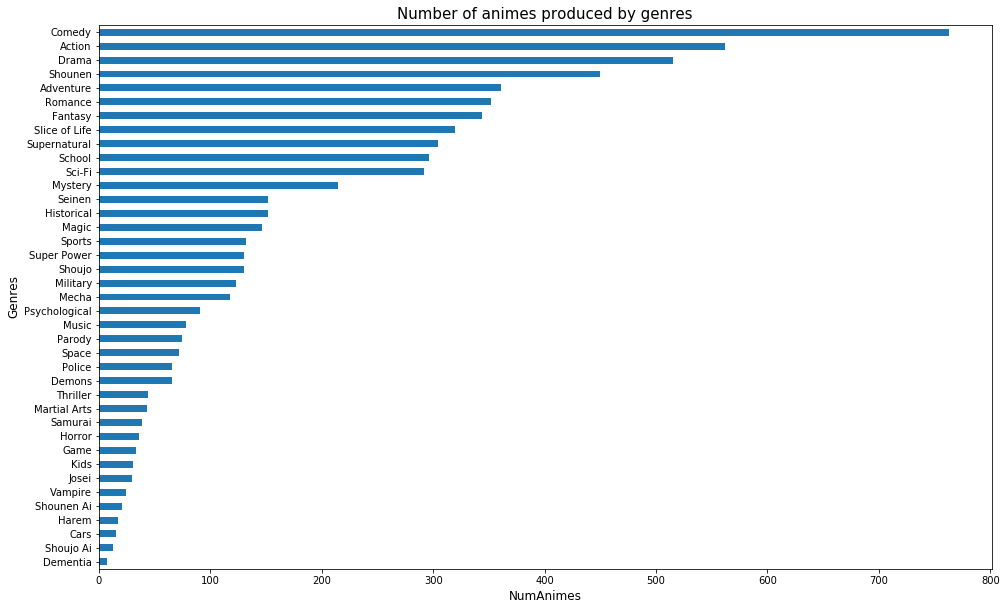

In [20]:
plt.figure(figsize=(16,10))
num_genres.sort_values().plot.barh()
plt.title("Number of animes produced by genres", fontsize=15)
plt.xlabel("NumAnimes", fontsize=12)
plt.ylabel("Genres", fontsize=12)
plt.show()

**Trả lời câu hỏi:**

Nhìn vào biểu đồ và output của Code bước 1, ta thấy được số lượng anime được sản xuất theo mỗi thể loại. Trong đó thì Comedy, Action và Drama là 3 thể loại được sản xuất nhiều nhất.

**Ý nghĩa:**

Kết quả cho ta thấy những thể loại nào sẽ được sản xuất từ nhiều nhất đến ít nhất. Có vẻ các yếu tố (Comedy, Action, Drama) được người xem rất ưa chuộng nên mới được các nhà sản xuất thêm vào nhiều như vậy. Đặc biệt là Comedy (Hài hước) được đặt lên hàng đầu cho thấy sự quan trọng của nó trong anime.

### 4. Trong 10 năm gần đây, 3 nguồn (Sources) chất lượng nhất dùng để chuyển thể sang anime có sự thay đổi như thế nào?

Để trả lời cho câu hỏi này, ta sẽ thực hiện qua 2 bước:
- Bước 1: Tính dataframe `num_three_best_sources` gồm 3 cột Year (Năm), Sources (Các loại nguồn để sản xuất thành anime) và "counts" (số lượng anime của mỗi nguồn theo năm); và 10 dòng ứng với 10 năm (2009,2010,...2018).
- Bước 2: Từ kết quả trên, ta vẽ 3 đường dạng line (ứng với mỗi sources) trên cùng một đồ thị, trong đó trục hoành là năm và trục tung là số lượng được chuyển thể. Đặt tên cho trục hoành là "Year", trục tung là "NumAdaptions".

Code bước 1.

In [21]:
# Groupby theo Year và Sources
ten_recent_years = anime_df[anime_df.Year > anime_df.Year.max()-10]
num_animes_each_source = ten_recent_years.groupby(["Year","Sources"])["Title"].agg("count").reset_index(name='counts')
num_animes_each_source.Year=num_animes_each_source.Year.astype(int)
num_animes_each_source

,Year,Sources,counts
0,2009,4-koma manga,5
1,2009,Book,1
2,2009,Game,5
3,2009,Light novel,11
4,2009,Manga,40
...,...,...,...
90,2018,Manga,21
91,2018,Novel,2
92,2018,Original,8
93,2018,Visual novel,1


In [22]:
# Lấy ra 3 nguồn (Sources) tốt nhất.
three_best_sources = num_animes_each_source.groupby("Sources")["counts"].agg("sum").sort_values(ascending=False)[:3]
three_best_sources = sorted(three_best_sources.index)
three_best_sources

['Light novel', 'Manga', 'Original']

In [23]:
# Tạo DataFrame num_three_best_sources
df = num_animes_each_source
src = three_best_sources
num_three_best_sources=pd.DataFrame(columns=src,index=range(2009,2019))
for year in range(2009,2019):
    data=df[(df.Year==year) & ((df.Sources==src[0])|(df.Sources==src[1])|(df.Sources==src[2]))].counts
    num_three_best_sources.loc[year]=list(data)
num_three_best_sources

,Light novel,Manga,Original
2009,11,40,10
2010,9,38,11
2011,13,42,17
2012,11,42,14
2013,16,44,17
2014,13,60,17
2015,16,60,20
2016,13,60,16
2017,19,52,15
2018,4,21,8


Code bước 2.

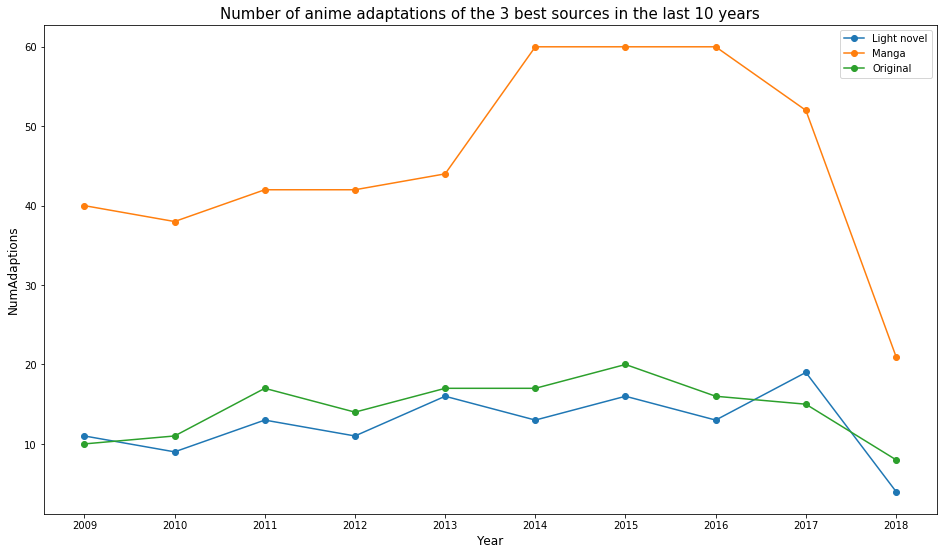

In [24]:
# Vẽ đồ thị
plt.figure(figsize=(16,9))
plt.plot(num_three_best_sources, marker="o")
plt.xticks(range(2009,2019,1))
plt.xlabel("Year", fontsize=12)
plt.ylabel("NumAdaptions", fontsize=12)
plt.title("Number of anime adaptations of the 3 best sources in the last 10 years", fontsize=15)
plt.legend(src)
plt.show()

**Trả lời câu hỏi:**

Trong 10 năm gần nhất, 3 nguồn tốt nhất là "Light novel", "Manga" và "Original". Trong đó "Manga" luôn áp đảo 2 nguồn còn lại; "Light novel" và "Original" không hơn kém nhau nhiều.

**Ý nghĩa:**

Kết quả cho thấy trong vòng 10 năm gần đây, việc chuyển thể từ manga sang anime luôn chiếm ưu thế áp đảo. Điều này chứng tỏ nếu đã có manga làm nền trước đó thì khả năng được sản xuất thành anime là khá cao. Điều này khuyến khích những tác giả nên vẽ manga (truyện tranh) nhiều hơn để tác phẩm của mình được biết đến rộng rãi và có thể kiếm được một khoản kha khá từ việc mua bản quyền từ nhà sản xuất.

---

## Nhìn lại quá trình làm đồ án

### Khó khăn:
- Dữ liệu chưa tốt (số dòng không nhiều và nhiều dòng chứa giá trị trống) gây khó khăn cho việc xử lý.
- Việc đưa ra được một câu hỏi có ý nghĩa cần tốn khá nhiều thời gian và công sức.

### Những thứ học được:
- Khả năng sử dụng thư viện numpy, pandas chuyên nghiệp hơn.
- Nắm vững 1 quy trình khoa học dữ liệu là như thế nào.

### Làm gì nếu có thêm thời gian:
- Đặt thêm nhiều câu hỏi thú vị hơn.
- Tìm hiểu thêm trực quan hóa dữ liệu để thể hiện biểu đồ đẹp mắt.

## Tài liệu tham khảo:

Tham khảo template "BT03-Pandas.ipynb" trên [thùng chứa môn học](https://drive.google.com/drive/folders/1EKaa7pQZMK4m0_gNQNf4oafXgPMQzbBc)